# Training a model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import glob

## Model from a dataset with 100ms windows and 100ms slide

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/filtered_100/result.csv')

In [ ]:
df

,Unnamed: 0,Nav/Raw.X[RightCheek]_mean,Nav/Raw.X[RightCheek]_std,Nav/Raw.X[RightCheek]_min_,Nav/Raw.X[RightCheek]_max_,Nav/Raw.X[RightCheek]_range_,Nav/Raw.X[RightCheek]_iqr,Nav/Raw.X[RightCheek]_kurtosis,Nav/Raw.X[RightCheek]_skewness,Nav/Raw.X[RightCheek]_rms,...,Prox/Raw[LeftCheek]_std,Prox/Raw[LeftCheek]_min_,Prox/Raw[LeftCheek]_max_,Prox/Raw[LeftCheek]_range_,Prox/Raw[LeftCheek]_iqr,Prox/Raw[LeftCheek]_kurtosis,Prox/Raw[LeftCheek]_skewness,Prox/Raw[LeftCheek]_rms,Label,FileId
0,0,0.334545,0.000068,0.334448,0.334642,0.000193,0.000097,-1.300000,-2.193444e-12,0.334545,...,0.004149,0.288627,0.299647,0.011020,0.006516,-1.258394,0.449808,0.293055,neutral,0
1,1,0.334303,0.000068,0.334207,0.334400,0.000193,0.000097,-1.300000,2.193508e-12,0.334303,...,0.003475,0.294008,0.302773,0.008765,0.005987,-1.590281,-0.408948,0.299124,neutral,0
2,2,0.335010,0.001580,0.334082,0.338152,0.004070,0.000437,0.190709,1.458922e+00,0.335014,...,0.003362,0.294709,0.304038,0.009329,0.001369,0.013360,-1.313131,0.301282,neutral,0
3,3,0.345372,0.001580,0.342231,0.346301,0.004070,0.000437,0.190709,-1.458922e+00,0.345376,...,0.001801,0.289084,0.293946,0.004861,0.002666,-1.236423,0.505049,0.291050,neutral,0
4,4,0.346079,0.000068,0.345982,0.346175,0.000193,0.000097,-1.300000,2.193508e-12,0.346079,...,0.000711,0.290621,0.292432,0.001811,0.001128,-1.312922,0.581730,0.291287,neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208396,208396,-1.183713,0.119822,-1.339922,-1.001887,0.338034,0.167593,-1.263736,2.291958e-01,1.189762,...,0.022866,-1.008502,-0.947671,0.060831,0.038886,-1.520183,0.113565,0.979816,neutral,64
208397,208397,-1.416721,0.033492,-1.469874,-1.377905,0.091969,0.048929,-1.242723,-4.201763e-01,1.417117,...,0.018271,-1.010354,-0.961017,0.049336,0.023123,-1.033193,0.717367,0.992296,neutral,64
208398,208398,-1.632206,0.077917,-1.725323,-1.517845,0.207478,0.129686,-1.466903,2.443289e-01,1.634065,...,0.063944,-0.947420,-0.772441,0.174979,0.101160,-1.436599,-0.066945,0.860203,neutral,64
208399,208399,-1.813427,0.068055,-1.920038,-1.734283,0.185754,0.102186,-1.291165,-3.909356e-01,1.814704,...,0.010297,-0.735255,-0.707294,0.027961,0.014139,-1.404295,-0.391105,0.719676,neutral,64


In [ ]:
#Checking for null values
missing_values = df.isnull().sum()
print(f"Number of missing values by column:\n{missing_values}")

Number of missing values by column:
Unnamed: 0                      0
Nav/Raw.X[RightCheek]_mean      0
Nav/Raw.X[RightCheek]_std       0
Nav/Raw.X[RightCheek]_min_      0
Nav/Raw.X[RightCheek]_max_      0
                               ..
Prox/Raw[LeftCheek]_kurtosis    0
Prox/Raw[LeftCheek]_skewness    0
Prox/Raw[LeftCheek]_rms         0
Label                           0
FileId                          0
Length: 165, dtype: int64


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.value_counts('Label')

Label
neutral          132422
smile             19455
frown             19183
eyebrow_raise     18873
squeezed_eyes     18468
dtype: int64

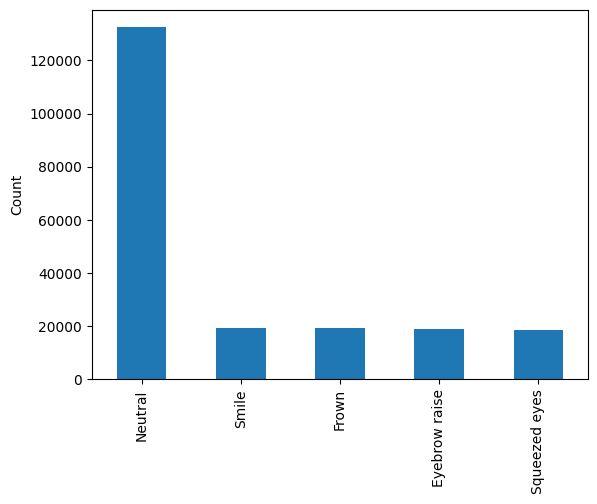

In [ ]:
#visualizing the imbalance of the labels
df['Label'].value_counts().plot(kind='bar')
plt.xticks([0,1,2,3,4], ['Neutral', 'Smile','Frown','Eyebrow raise','Squeezed eyes'])
plt.ylabel('Count');

In [ ]:
import random

In [ ]:
all_subjects=list(range(1,66))

In [ ]:
random.shuffle(all_subjects)

In [ ]:
# 45/10/10 train test validation split
train_ids=all_subjects[:45]
test_ids=all_subjects[45:55]
validation_ids=all_subjects[55:65]

In [ ]:
train_df=df[df['FileId'].isin(train_ids)]
test_df=df[df['FileId'].isin(test_ids)]
validation_df=df[df['FileId'].isin(validation_ids)]

In [ ]:
def undersample_neutral(df, factor):
    df_neutral = df.loc[df.Label == 'neutral'].iloc[::factor, :]
    df = df.loc[df.Label != 'neutral']
    df = pd.concat([df, df_neutral], axis=0)
    return df

In [ ]:
#undersampling only the train set
undersampled_train_df=pd.DataFrame()
undersampled_train_df=undersample_neutral(train_df,7)

In [ ]:
undersampled_train_df.value_counts('Label')

Label
smile            13174
frown            12889
neutral          12848
eyebrow_raise    12605
squeezed_eyes    12507
dtype: int64

In [ ]:
X_train=undersampled_train_df.drop(['Label','FileId'],axis=1)
y_train=undersampled_train_df['Label']

X_test=test_df.drop(['Label','FileId'],axis=1)
y_test=test_df['Label']

X_val=validation_df.drop(['Label','FileId'],axis=1)
y_val=validation_df['Label']

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix

In [ ]:
dummy = DummyClassifier(strategy='uniform')
dummy.fit(X_train, y_train)

print("Score on test: {}".format(dummy.score(X_test, y_test)))

Score on test: 0.20067390490453013


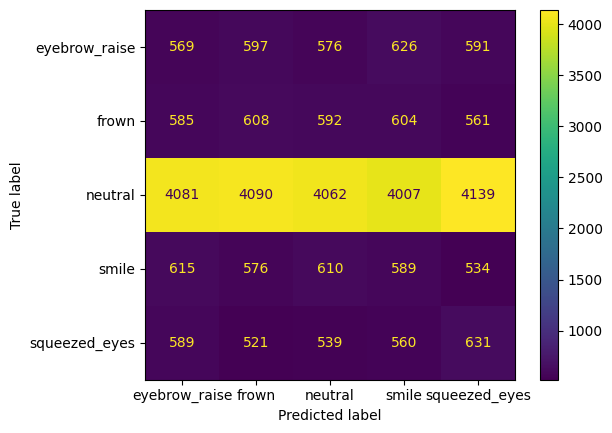

In [ ]:
cm=confusion_matrix(y_test, dummy.predict(X_test),labels=dummy.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=dummy.classes_)
disp.plot()
plt.show()

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

print("Score on test: {}".format(rf.score(X_test, y_test)))

Score on test: 0.8692749282416073


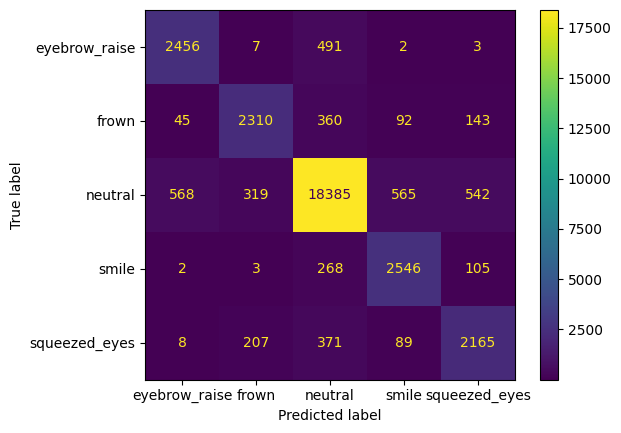

In [ ]:
cm=confusion_matrix(y_test, rf.predict(X_test),labels=rf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=rf.classes_)
disp.plot()
plt.show()

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred, target_names=df['Label'].unique()))

               precision    recall  f1-score   support

      neutral       0.80      0.83      0.81      2959
        smile       0.81      0.78      0.80      2950
        frown       0.93      0.90      0.91     20379
eyebrow_raise       0.77      0.87      0.82      2924
squeezed_eyes       0.73      0.76      0.75      2840

     accuracy                           0.87     32052
    macro avg       0.81      0.83      0.82     32052
 weighted avg       0.87      0.87      0.87     32052



# Model from a dataset with 500ms windows and 100ms slide

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/filtered_500/result.csv', index_col=[0])

In [ ]:
df

,Nav/Raw.X[RightCheek]_mean,Nav/Raw.X[RightCheek]_std,Nav/Raw.X[RightCheek]_min_,Nav/Raw.X[RightCheek]_max_,Nav/Raw.X[RightCheek]_range_,Nav/Raw.X[RightCheek]_iqr,Nav/Raw.X[RightCheek]_kurtosis,Nav/Raw.X[RightCheek]_skewness,Nav/Raw.X[RightCheek]_rms,Nav/Raw.Y[RightCheek]_mean,...,Prox/Raw[LeftCheek]_std,Prox/Raw[LeftCheek]_min_,Prox/Raw[LeftCheek]_max_,Prox/Raw[LeftCheek]_range_,Prox/Raw[LeftCheek]_iqr,Prox/Raw[LeftCheek]_kurtosis,Prox/Raw[LeftCheek]_skewness,Prox/Raw[LeftCheek]_rms,Label,FileId
0,0.339062,0.005541,0.334082,0.346301,0.012219,0.011679,-1.758069,0.408154,0.339107,0.037659,...,0.005170,0.288627,0.304038,0.015411,0.010166,-1.322766,0.461982,0.295190,neutral,0
1,0.341363,0.005579,0.334082,0.346769,0.012687,0.011727,-1.757957,-0.405005,0.341409,0.044483,...,0.005202,0.289084,0.304407,0.015322,0.010759,-1.489781,0.317173,0.296072,neutral,0
2,0.345220,0.006017,0.334082,0.353938,0.019856,0.000472,-0.375002,-0.503133,0.345273,0.053784,...,0.008248,0.289084,0.321010,0.031926,0.012849,0.113739,0.887820,0.298514,neutral,0
3,0.344483,0.008204,0.324503,0.353938,0.029435,0.000934,0.867759,-1.308137,0.344581,0.064821,...,0.014034,0.289084,0.328371,0.039287,0.020005,-1.127573,0.664916,0.303773,neutral,0
4,0.342430,0.009208,0.324503,0.353938,0.029435,0.010029,-0.714520,-0.660376,0.342554,0.080076,...,0.015045,0.290621,0.328371,0.037750,0.032901,-1.674421,-0.104700,0.311051,neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207356,0.322789,1.278603,-1.339922,2.406812,3.746734,2.097422,-1.195207,0.458554,1.318719,-0.817331,...,0.068826,-1.008502,-0.797106,0.211397,0.134027,-1.546083,-0.013367,0.900467,neutral,64
207357,-0.427204,0.931623,-1.469874,1.840298,3.310172,1.375048,-0.280373,0.798368,1.024902,0.111488,...,0.075694,-1.010354,-0.797106,0.213248,0.154635,-1.600995,-0.060785,0.907341,neutral,64
207358,-0.969824,0.600849,-1.725323,0.265983,1.991306,0.972562,-1.010949,0.570205,1.140867,0.860179,...,0.075760,-1.010354,-0.772441,0.237913,0.151289,-1.487383,0.024200,0.908693,neutral,64
207359,-1.326958,0.438037,-1.920038,-0.361707,1.558330,0.596092,-0.446095,0.760662,1.397389,1.406912,...,0.104801,-1.010354,-0.707294,0.303060,0.174660,-1.239743,0.426012,0.890154,neutral,64


In [ ]:
df=df.drop('Unnamed: 0', axis=1)

In [ ]:
df

,Nav/Raw.X()RightCheek)_mean,Nav/Raw.X()RightCheek)_std,Nav/Raw.X()RightCheek)_min_,Nav/Raw.X()RightCheek)_max_,Nav/Raw.X()RightCheek)_range_,Nav/Raw.X()RightCheek)_iqr,Nav/Raw.X()RightCheek)_kurtosis,Nav/Raw.X()RightCheek)_skewness,Nav/Raw.X()RightCheek)_rms,Nav/Raw.Y()RightCheek)_mean,...,Prox/Raw()LeftCheek)_std,Prox/Raw()LeftCheek)_min_,Prox/Raw()LeftCheek)_max_,Prox/Raw()LeftCheek)_range_,Prox/Raw()LeftCheek)_iqr,Prox/Raw()LeftCheek)_kurtosis,Prox/Raw()LeftCheek)_skewness,Prox/Raw()LeftCheek)_rms,Label,FileId
0,0.339062,0.005541,0.334082,0.346301,0.012219,0.011679,-1.758069,0.408154,0.339107,0.037659,...,0.005170,0.288627,0.304038,0.015411,0.010166,-1.322766,0.461982,0.295190,neutral,0
1,0.341363,0.005579,0.334082,0.346769,0.012687,0.011727,-1.757957,-0.405005,0.341409,0.044483,...,0.005202,0.289084,0.304407,0.015322,0.010759,-1.489781,0.317173,0.296072,neutral,0
2,0.345220,0.006017,0.334082,0.353938,0.019856,0.000472,-0.375002,-0.503133,0.345273,0.053784,...,0.008248,0.289084,0.321010,0.031926,0.012849,0.113739,0.887820,0.298514,neutral,0
3,0.344483,0.008204,0.324503,0.353938,0.029435,0.000934,0.867759,-1.308137,0.344581,0.064821,...,0.014034,0.289084,0.328371,0.039287,0.020005,-1.127573,0.664916,0.303773,neutral,0
4,0.342430,0.009208,0.324503,0.353938,0.029435,0.010029,-0.714520,-0.660376,0.342554,0.080076,...,0.015045,0.290621,0.328371,0.037750,0.032901,-1.674421,-0.104700,0.311051,neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207356,0.322789,1.278603,-1.339922,2.406812,3.746734,2.097422,-1.195207,0.458554,1.318719,-0.817331,...,0.068826,-1.008502,-0.797106,0.211397,0.134027,-1.546083,-0.013367,0.900467,neutral,64
207357,-0.427204,0.931623,-1.469874,1.840298,3.310172,1.375048,-0.280373,0.798368,1.024902,0.111488,...,0.075694,-1.010354,-0.797106,0.213248,0.154635,-1.600995,-0.060785,0.907341,neutral,64
207358,-0.969824,0.600849,-1.725323,0.265983,1.991306,0.972562,-1.010949,0.570205,1.140867,0.860179,...,0.075760,-1.010354,-0.772441,0.237913,0.151289,-1.487383,0.024200,0.908693,neutral,64
207359,-1.326958,0.438037,-1.920038,-0.361707,1.558330,0.596092,-0.446095,0.760662,1.397389,1.406912,...,0.104801,-1.010354,-0.707294,0.303060,0.174660,-1.239743,0.426012,0.890154,neutral,64


In [ ]:
#Checking for null values
missing_values = df.isnull().sum()
print(f"Number of missing values by column:\n{missing_values}")

Number of missing values by column:
Nav/Raw.X[RightCheek]_mean      0
Nav/Raw.X[RightCheek]_std       0
Nav/Raw.X[RightCheek]_min_      0
Nav/Raw.X[RightCheek]_max_      0
Nav/Raw.X[RightCheek]_range_    0
                               ..
Prox/Raw[LeftCheek]_kurtosis    0
Prox/Raw[LeftCheek]_skewness    0
Prox/Raw[LeftCheek]_rms         0
Label                           0
FileId                          0
Length: 164, dtype: int64


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.value_counts('Label')

Label
neutral          131385
smile             19460
frown             19183
eyebrow_raise     18873
squeezed_eyes     18460
dtype: int64

In [ ]:
all_subjects=list(range(1,66))

In [ ]:
random.shuffle(all_subjects)

In [ ]:
# 45/10/10 train test validation split
train_ids=all_subjects[:45]
test_ids=all_subjects[45:55]
validation_ids=all_subjects[55:65]

In [ ]:
train_df=df[df['FileId'].isin(train_ids)]
test_df=df[df['FileId'].isin(test_ids)]
validation_df=df[df['FileId'].isin(validation_ids)]

In [ ]:
#undersampling only the train set
undersampled_train_df=pd.DataFrame()
undersampled_train_df=undersample_neutral(train_df,7)

In [ ]:
undersampled_train_df.value_counts('Label')

Label
smile            13153
frown            13078
neutral          12739
eyebrow_raise    12641
squeezed_eyes    12340
dtype: int64

In [ ]:
X_train=undersampled_train_df.drop(['Label','FileId'],axis=1)
y_train=undersampled_train_df['Label']

X_test=test_df.drop(['Label','FileId'],axis=1)
y_test=test_df['Label']

X_val=validation_df.drop(['Label','FileId'],axis=1)
y_val=validation_df['Label']

In [ ]:
dummy = DummyClassifier(strategy='uniform')
dummy.fit(X_train, y_train)

print("Score on test: {}".format(dummy.score(X_test, y_test)))

Score on test: 0.20256458490092802


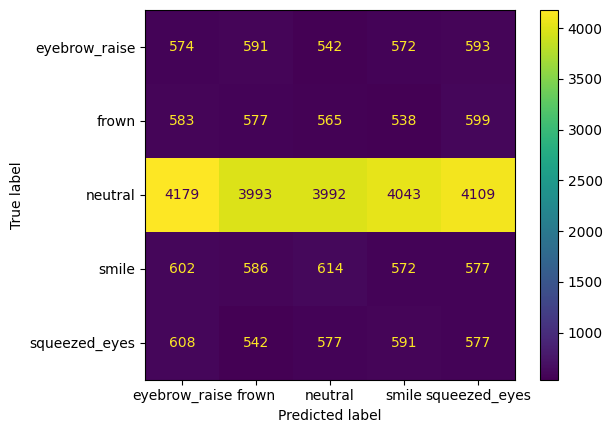

In [ ]:
cm=confusion_matrix(y_test, dummy.predict(X_test),labels=dummy.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=dummy.classes_)
disp.plot()
plt.show()

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

print("Score on test: {}".format(rf.score(X_test, y_test)))

Score on test: 0.8889275887290585


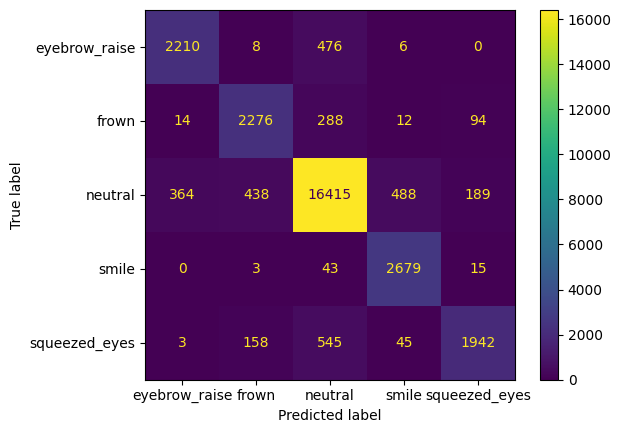

In [ ]:
cm=confusion_matrix(y_test, rf.predict(X_test),labels=rf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=rf.classes_)
disp.plot()
plt.show()

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred, target_names=df['Label'].unique()))

               precision    recall  f1-score   support

      neutral       0.85      0.82      0.84      2700
        smile       0.79      0.85      0.82      2684
        frown       0.92      0.92      0.92     17894
eyebrow_raise       0.83      0.98      0.90      2740
squeezed_eyes       0.87      0.72      0.79      2693

     accuracy                           0.89     28711
    macro avg       0.85      0.86      0.85     28711
 weighted avg       0.89      0.89      0.89     28711



In [ ]:
import joblib

In [ ]:
joblib.dump(rf, '/content/drive/MyDrive/rf_500.sav')

['/content/drive/MyDrive/rf_500.sav']

In [ ]:
loaded_model = joblib.load('/content/drive/MyDrive/rf_500.sav')

In [ ]:
res = loaded_model.score(X_test, y_test)
print(res)

0.8889275887290585


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [ ]:
df.columns = df.columns.str.replace('[', '(').str.replace(']', ')')

In [ ]:
df

,Nav/Raw.X(RightCheek)_mean,Nav/Raw.X(RightCheek)_std,Nav/Raw.X(RightCheek)_min_,Nav/Raw.X(RightCheek)_max_,Nav/Raw.X(RightCheek)_range_,Nav/Raw.X(RightCheek)_iqr,Nav/Raw.X(RightCheek)_kurtosis,Nav/Raw.X(RightCheek)_skewness,Nav/Raw.X(RightCheek)_rms,Nav/Raw.Y(RightCheek)_mean,...,Prox/Raw(LeftCheek)_std,Prox/Raw(LeftCheek)_min_,Prox/Raw(LeftCheek)_max_,Prox/Raw(LeftCheek)_range_,Prox/Raw(LeftCheek)_iqr,Prox/Raw(LeftCheek)_kurtosis,Prox/Raw(LeftCheek)_skewness,Prox/Raw(LeftCheek)_rms,Label,FileId
0,0.339062,0.005541,0.334082,0.346301,0.012219,0.011679,-1.758069,0.408154,0.339107,0.037659,...,0.005170,0.288627,0.304038,0.015411,0.010166,-1.322766,0.461982,0.295190,neutral,0
1,0.341363,0.005579,0.334082,0.346769,0.012687,0.011727,-1.757957,-0.405005,0.341409,0.044483,...,0.005202,0.289084,0.304407,0.015322,0.010759,-1.489781,0.317173,0.296072,neutral,0
2,0.345220,0.006017,0.334082,0.353938,0.019856,0.000472,-0.375002,-0.503133,0.345273,0.053784,...,0.008248,0.289084,0.321010,0.031926,0.012849,0.113739,0.887820,0.298514,neutral,0
3,0.344483,0.008204,0.324503,0.353938,0.029435,0.000934,0.867759,-1.308137,0.344581,0.064821,...,0.014034,0.289084,0.328371,0.039287,0.020005,-1.127573,0.664916,0.303773,neutral,0
4,0.342430,0.009208,0.324503,0.353938,0.029435,0.010029,-0.714520,-0.660376,0.342554,0.080076,...,0.015045,0.290621,0.328371,0.037750,0.032901,-1.674421,-0.104700,0.311051,neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207356,0.322789,1.278603,-1.339922,2.406812,3.746734,2.097422,-1.195207,0.458554,1.318719,-0.817331,...,0.068826,-1.008502,-0.797106,0.211397,0.134027,-1.546083,-0.013367,0.900467,neutral,64
207357,-0.427204,0.931623,-1.469874,1.840298,3.310172,1.375048,-0.280373,0.798368,1.024902,0.111488,...,0.075694,-1.010354,-0.797106,0.213248,0.154635,-1.600995,-0.060785,0.907341,neutral,64
207358,-0.969824,0.600849,-1.725323,0.265983,1.991306,0.972562,-1.010949,0.570205,1.140867,0.860179,...,0.075760,-1.010354,-0.772441,0.237913,0.151289,-1.487383,0.024200,0.908693,neutral,64
207359,-1.326958,0.438037,-1.920038,-0.361707,1.558330,0.596092,-0.446095,0.760662,1.397389,1.406912,...,0.104801,-1.010354,-0.707294,0.303060,0.174660,-1.239743,0.426012,0.890154,neutral,64


In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

In [ ]:
print("Score on test: {}".format(xgb.score(X_test, y_test)))

Score on test: 0.897228492600953


In [ ]:
joblib.dump(xgb, '/content/drive/MyDrive/xgb_500.sav')

['/content/drive/MyDrive/xgb_500.sav']

# Model from a dataset with 1000ms windows and 100ms slide

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/filtered_1000_100/result.csv')

In [ ]:
df

,Nav/Raw.X[RightCheek]_mean,Nav/Raw.X[RightCheek]_std,Nav/Raw.X[RightCheek]_min_,Nav/Raw.X[RightCheek]_max_,Nav/Raw.X[RightCheek]_range_,Nav/Raw.X[RightCheek]_iqr,Nav/Raw.X[RightCheek]_kurtosis,Nav/Raw.X[RightCheek]_skewness,Nav/Raw.X[RightCheek]_rms,Nav/Raw.Y[RightCheek]_mean,...,Prox/Raw[LeftCheek]_std,Prox/Raw[LeftCheek]_min_,Prox/Raw[LeftCheek]_max_,Prox/Raw[LeftCheek]_range_,Prox/Raw[LeftCheek]_iqr,Prox/Raw[LeftCheek]_kurtosis,Prox/Raw[LeftCheek]_skewness,Prox/Raw[LeftCheek]_rms,Label,FileId
0,0.340744,0.007831,0.324503,0.353938,0.029435,0.011799,-0.891344,-0.157180,0.340834,0.066425,...,0.015280,0.288627,0.337035,0.048407,0.032889,-1.366423,0.470493,0.307179,neutral,0
1,0.327909,0.049806,0.092719,0.353938,0.261219,0.012041,12.711491,-3.664840,0.331670,0.074402,...,0.018330,0.289084,0.355416,0.066332,0.033357,-1.033081,0.432715,0.312545,neutral,0
2,0.302053,0.090429,0.066416,0.353938,0.287522,0.017999,1.868918,-1.910234,0.315299,0.072378,...,0.021086,0.289084,0.361356,0.072272,0.033062,-0.959333,0.367816,0.316990,neutral,0
3,0.282901,0.101173,0.066416,0.353938,0.287522,0.127783,-0.376111,-1.187038,0.300448,0.061091,...,0.029400,0.233545,0.361356,0.127811,0.036524,0.164367,-0.625809,0.312397,neutral,0
4,0.262622,0.107288,0.066416,0.353938,0.287522,0.193130,-1.282346,-0.704052,0.283691,0.058022,...,0.031169,0.233545,0.361356,0.127811,0.037419,-0.370054,-0.532369,0.310789,neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206056,1.363387,1.378601,-1.339922,2.448826,3.788748,2.426932,-1.089143,-0.790682,1.938908,-2.140183,...,0.061021,-1.025438,-0.797106,0.228332,0.061472,-0.447487,0.781175,0.931349,squeezed_eyes,64
206057,0.984951,1.558680,-1.469874,2.448826,3.918700,2.949296,-1.579365,-0.398812,1.843804,-1.662326,...,0.060629,-1.010354,-0.797106,0.213248,0.061472,-0.472814,0.839796,0.931357,squeezed_eyes,64
206058,0.582240,1.659536,-1.725323,2.448826,4.174149,3.582194,-1.723063,-0.042745,1.758710,-1.119559,...,0.064790,-1.010354,-0.772441,0.237913,0.104387,-0.814029,0.649782,0.919912,squeezed_eyes,64
206059,0.159890,1.678084,-1.920038,2.448826,4.368864,3.757658,-1.575194,0.308755,1.685684,-0.532914,...,0.086557,-1.010354,-0.707294,0.303060,0.134972,-0.673390,0.669046,0.898792,neutral,64


In [ ]:
#Checking for null values
missing_values = df.isnull().sum()
print(f"Number of missing values by column:\n{missing_values}")

Number of missing values by column:
Nav/Raw.X[RightCheek]_mean      0
Nav/Raw.X[RightCheek]_std       0
Nav/Raw.X[RightCheek]_min_      0
Nav/Raw.X[RightCheek]_max_      0
Nav/Raw.X[RightCheek]_range_    0
                               ..
Prox/Raw[LeftCheek]_kurtosis    0
Prox/Raw[LeftCheek]_skewness    0
Prox/Raw[LeftCheek]_rms         0
Label                           0
FileId                          0
Length: 164, dtype: int64


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.value_counts('Label')

Label
neutral          130154
frown             19358
smile             19256
eyebrow_raise     19021
squeezed_eyes     18272
dtype: int64

In [ ]:
all_subjects=list(range(1,66))

In [ ]:
random.shuffle(all_subjects)

In [ ]:
# 45/10/10 train test validation split
train_ids=all_subjects[:45]
test_ids=all_subjects[45:55]
validation_ids=all_subjects[55:65]

In [ ]:
train_df=df[df['FileId'].isin(train_ids)]
test_df=df[df['FileId'].isin(test_ids)]
validation_df=df[df['FileId'].isin(validation_ids)]

In [ ]:
#undersampling only the train set
undersampled_train_df=pd.DataFrame()
undersampled_train_df=undersample_neutral(train_df,7)

In [ ]:
undersampled_train_df.value_counts('Label')

Label
frown            12932
smile            12879
eyebrow_raise    12841
neutral          12657
squeezed_eyes    12238
dtype: int64

In [ ]:
X_train=undersampled_train_df.drop(['Label','FileId'],axis=1)
y_train=undersampled_train_df['Label']

X_test=test_df.drop(['Label','FileId'],axis=1)
y_test=test_df['Label']

X_val=validation_df.drop(['Label','FileId'],axis=1)
y_val=validation_df['Label']

In [ ]:
dummy = DummyClassifier(strategy='uniform')
dummy.fit(X_train, y_train)

print("Score on test: {}".format(dummy.score(X_test, y_test)))

Score on test: 0.20306440934455688


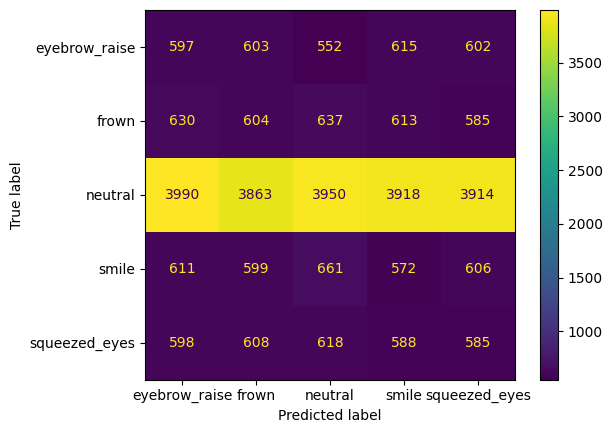

In [ ]:
cm=confusion_matrix(y_test, dummy.predict(X_test),labels=dummy.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=dummy.classes_)
disp.plot()
plt.show()

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

print("Score on test: {}".format(rf.score(X_test, y_test)))

Score on test: 0.8694158075601375


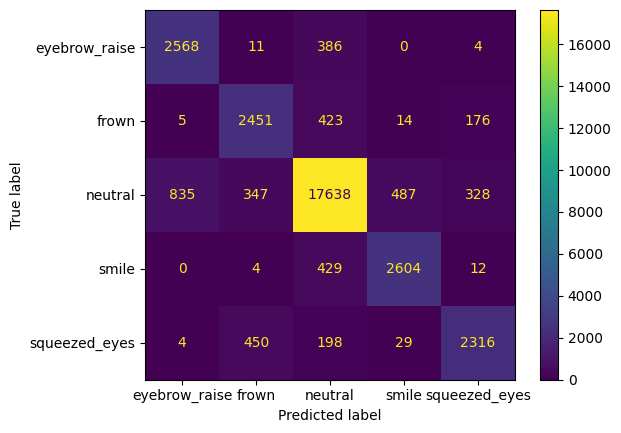

In [ ]:
cm=confusion_matrix(y_test, rf.predict(X_test),labels=rf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=rf.classes_)
disp.plot()
plt.show()

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred, target_names=df['Label'].unique()))

               precision    recall  f1-score   support

      neutral       0.75      0.86      0.80      2969
        smile       0.75      0.80      0.77      3069
        frown       0.92      0.90      0.91     19635
eyebrow_raise       0.83      0.85      0.84      3049
squeezed_eyes       0.82      0.77      0.79      2997

     accuracy                           0.87     31719
    macro avg       0.82      0.84      0.83     31719
 weighted avg       0.87      0.87      0.87     31719



# Model from a dataset with 1000ms windows and 500ms slide

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/filtered_1000_500/result.csv')

In [ ]:
df

,Nav/Raw.X[RightCheek]_mean,Nav/Raw.X[RightCheek]_std,Nav/Raw.X[RightCheek]_min_,Nav/Raw.X[RightCheek]_max_,Nav/Raw.X[RightCheek]_range_,Nav/Raw.X[RightCheek]_iqr,Nav/Raw.X[RightCheek]_kurtosis,Nav/Raw.X[RightCheek]_skewness,Nav/Raw.X[RightCheek]_rms,Nav/Raw.Y[RightCheek]_mean,...,Prox/Raw[LeftCheek]_std,Prox/Raw[LeftCheek]_min_,Prox/Raw[LeftCheek]_max_,Prox/Raw[LeftCheek]_range_,Prox/Raw[LeftCheek]_iqr,Prox/Raw[LeftCheek]_kurtosis,Prox/Raw[LeftCheek]_skewness,Prox/Raw[LeftCheek]_rms,Label,FileId
0,0.340744,0.007831,0.324503,0.353938,0.029435,0.011799,-0.891344,-0.157180,0.340834,0.066425,...,0.015280,0.288627,0.337035,0.048407,0.032889,-1.366423,0.470493,0.307179,neutral,0
1,0.238003,0.113807,0.066416,0.353938,0.287522,0.218267,-1.704522,-0.293403,0.263813,0.050786,...,0.039318,0.208319,0.361356,0.153037,0.052101,-0.453685,-0.708538,0.305764,neutral,0
2,0.156005,0.059274,0.066416,0.328192,0.261776,0.059785,0.186471,0.657048,0.166887,0.104869,...,0.045268,0.208319,0.365975,0.157655,0.080932,-1.111509,-0.295609,0.307370,neutral,0
3,0.224415,0.056553,0.122280,0.282797,0.160517,0.117177,-1.259711,-0.592411,0.231431,0.217959,...,0.042744,0.261394,0.398749,0.137355,0.076826,-0.625779,-0.778838,0.357624,neutral,0
4,0.279460,0.013308,0.246420,0.298353,0.051933,0.011289,0.734035,-1.078036,0.279777,0.247396,...,0.006974,0.374608,0.398749,0.024141,0.002459,1.160131,-1.672563,0.393347,neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41308,2.602376,0.086957,2.470121,2.746792,0.276671,0.164623,-1.233924,0.488369,2.603828,-3.567852,...,0.488970,-0.931304,0.468331,1.399636,0.781951,-0.816444,0.936849,0.730678,squeezed_eyes,64
41309,2.458415,0.088604,2.320179,2.576154,0.255975,0.191336,-1.559051,-0.146769,2.460011,-3.539867,...,0.032991,-0.919254,-0.811495,0.107760,0.056884,-0.865920,0.685305,0.875247,squeezed_eyes,64
41310,2.364653,0.037641,2.320179,2.458760,0.138581,0.062345,-0.431721,0.830270,2.364952,-3.379492,...,0.057646,-1.025438,-0.811495,0.213943,0.066934,-0.266544,-0.707282,0.890329,squeezed_eyes,64
41311,2.242904,0.420473,0.442890,2.448826,2.005936,0.077465,9.091049,-3.186345,2.281976,-3.239863,...,0.053721,-1.025438,-0.797106,0.228332,0.072371,-0.293470,0.495777,0.925923,squeezed_eyes,64


In [ ]:
#Checking for null values
missing_values = df.isnull().sum()
print(f"Number of missing values by column:\n{missing_values}")

Number of missing values by column:
Nav/Raw.X[RightCheek]_mean      0
Nav/Raw.X[RightCheek]_std       0
Nav/Raw.X[RightCheek]_min_      0
Nav/Raw.X[RightCheek]_max_      0
Nav/Raw.X[RightCheek]_range_    0
                               ..
Prox/Raw[LeftCheek]_kurtosis    0
Prox/Raw[LeftCheek]_skewness    0
Prox/Raw[LeftCheek]_rms         0
Label                           0
FileId                          0
Length: 164, dtype: int64


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.value_counts('Label')

Label
neutral          26118
frown             3882
smile             3845
eyebrow_raise     3819
squeezed_eyes     3649
dtype: int64

In [ ]:
all_subjects=list(range(1,66))

In [ ]:
random.shuffle(all_subjects)

In [ ]:
# 45/10/10 train test validation split
train_ids=all_subjects[:45]
test_ids=all_subjects[45:55]
validation_ids=all_subjects[55:65]

In [ ]:
train_df=df[df['FileId'].isin(train_ids)]
test_df=df[df['FileId'].isin(test_ids)]
validation_df=df[df['FileId'].isin(validation_ids)]

In [ ]:
#undersampling only the train set
undersampled_train_df=pd.DataFrame()
undersampled_train_df=undersample_neutral(train_df,7)

In [ ]:
undersampled_train_df.value_counts('Label')

Label
frown            2619
smile            2591
eyebrow_raise    2577
neutral          2532
squeezed_eyes    2461
dtype: int64

In [ ]:
X_train=undersampled_train_df.drop(['Label','FileId'],axis=1)
y_train=undersampled_train_df['Label']

X_test=test_df.drop(['Label','FileId'],axis=1)
y_test=test_df['Label']

X_val=validation_df.drop(['Label','FileId'],axis=1)
y_val=validation_df['Label']

In [ ]:
dummy = DummyClassifier(strategy='uniform')
dummy.fit(X_train, y_train)

print("Score on test: {}".format(dummy.score(X_test, y_test)))

Score on test: 0.2072383949645948


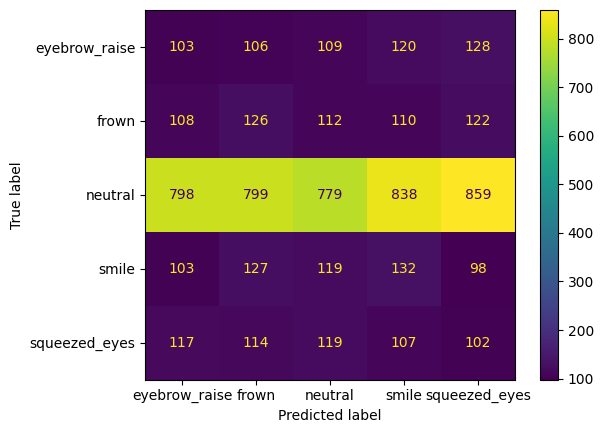

In [ ]:
cm=confusion_matrix(y_test, dummy.predict(X_test),labels=dummy.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=dummy.classes_)
disp.plot()
plt.show()

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

print("Score on test: {}".format(rf.score(X_test, y_test)))

Score on test: 0.8623131392604249


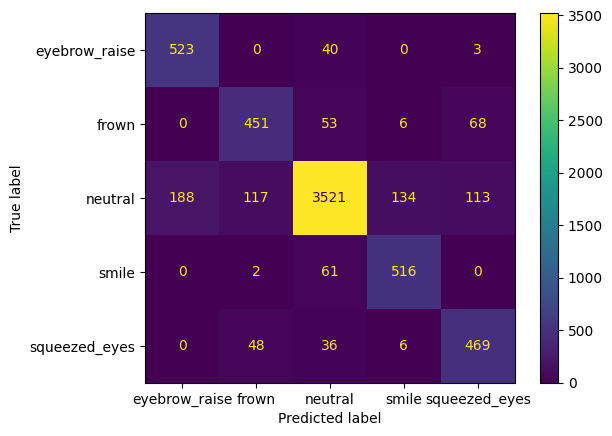

In [ ]:
cm=confusion_matrix(y_test, rf.predict(X_test),labels=rf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=rf.classes_)
disp.plot()
plt.show()

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred, target_names=df['Label'].unique()))

               precision    recall  f1-score   support

      neutral       0.74      0.92      0.82       566
        smile       0.73      0.78      0.75       578
        frown       0.95      0.86      0.90      4073
eyebrow_raise       0.78      0.89      0.83       579
squeezed_eyes       0.72      0.84      0.77       559

     accuracy                           0.86      6355
    macro avg       0.78      0.86      0.82      6355
 weighted avg       0.87      0.86      0.87      6355

